# Self Orginizing Map

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
import cv2

In [2]:
def check_new(new):
    if new[0]>1:
        new[0]=1
    if new[0]<0:
        new[0]=0
    if new[1]>1:
        new[1]=1
    if new[1]<0:
        new[1]=0
    return new
        

In [3]:
def print_graph(nlist,slist):
    figure(figsize=(12, 12))
    X=[]
    Y=[]
#     num=[]
    for i in range(len(nlist)):
        X.append(nlist[i][0])
        Y.append(nlist[i][1])
#         num.append(i)
        plt.annotate(i,(nlist[i][0],nlist[i][1]))
        plt.plot(nlist[i][0],nlist[i][1],'*r')
    X.append(nlist[0][0])
    Y.append(nlist[0][1])
    Xp=[]
    Yp=[]
    for n in slist:
        Xp.append(n[0])
        Yp.append(n[1])
    plt.plot(Xp,Yp,'.')
    plt.plot(X,Y)
    plt.show()

In [4]:
def make_nlist():
    nueron_lst=[]
    xarr=np.arange(0,1,1/26)
    yarr=np.arange(0,1,1/24)

    for i in range(len(xarr)):
        nueron_lst.append(np.array([xarr[i] ,1]))
    for i in range(len(yarr)-1,-1,-1):
        nueron_lst.append(np.array([1 ,yarr[i]]))
    for i in range(len(xarr)-1,-1,-1):
        nueron_lst.append(np.array([xarr[i] ,0]))
    for i in range(len(yarr)):
        nueron_lst.append(np.array([0 ,yarr[i]]))
    return nueron_lst


In [5]:
def make_dlist():
    nueron_lst=[]
    xarr=np.arange(0,1,1/8)
    yarr=np.arange(0,1,1/7)

    for i in range(len(xarr)):
        nueron_lst.append(np.array([xarr[i] ,1]))
    for i in range(len(yarr)-1,-1,-1):
        nueron_lst.append(np.array([1 ,yarr[i]]))
    for i in range(len(xarr)-1,-1,-1):
        nueron_lst.append(np.array([xarr[i] ,0]))
    for i in range(len(yarr)):
        nueron_lst.append(np.array([0 ,yarr[i]]))
    return nueron_lst


In [6]:
def SOM(data):
    nueron_lst=make_nlist()
    mid=25
    num=25
    alpha=0.2
    ker=cv2.getGaussianKernel(mid*2+1,-1)
    sampled_points=[]
    for i in range(50):
        print("iteration ",i )
#         print_graph(nueron_lst,sampled_points)
        if i>0 and i%3==0:
            num-=1
        if i>0 and i%25==0:
            alpha/=2
        sampled_points=[]
        data=data.sample(frac=1)
        for index, row in data.iterrows():
            sampled_points.append(np.array([row[0], row[1]]))
            small_dist=np.inf

            # find closest nueron
            for n in range(len(nueron_lst)):
                dist=np.sqrt((row[0]-nueron_lst[n][0])**2+(row[1]-nueron_lst[n][1])**2)
                if dist<small_dist:
                    small_dist=dist
                    spot=n
                    
            # update weights of nuerons
            new = nueron_lst[spot]+alpha*ker[mid]*(sampled_points[-1]-nueron_lst[spot])
            new=check_new(new)
            nueron_lst[spot]=new
            
           
            for j in range(1,num):
                new = nueron_lst[(spot+j)%len(nueron_lst)]+alpha*ker[mid+j]*(sampled_points[-1]-nueron_lst[(spot+j)%len(nueron_lst)])
                new=check_new(new)
                nueron_lst[(spot+j)%len(nueron_lst)]=new

    print("iteration ",i )
    print_graph(nueron_lst,sampled_points)


In [7]:
data_reg=pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data_reg[i] = [randX, randY]
data_reg=data_reg.T

iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  49


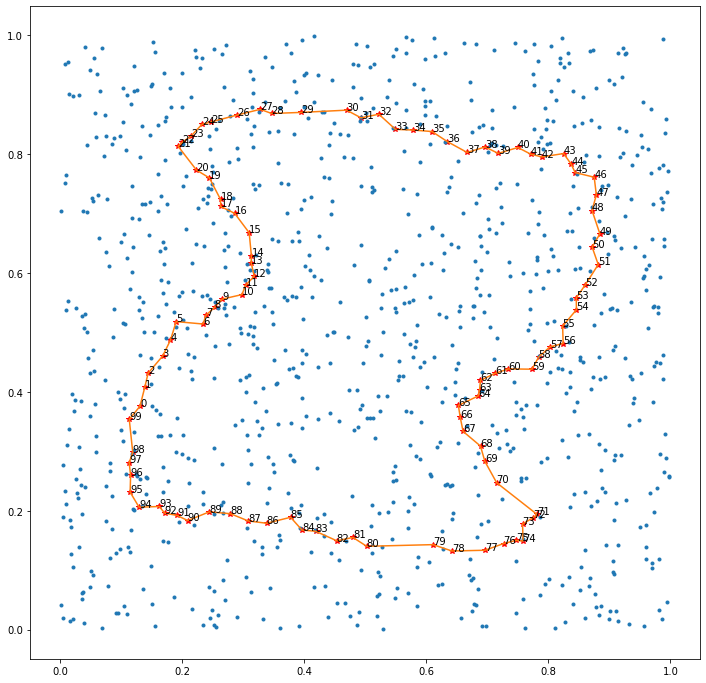

In [8]:
SOM(data_reg)

In [9]:
data_corner=pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randX<=0.5:
        randX=randX**2
    else:
        randX=randX**0.5
    if randY<=0.5:
        randY=randY**2
    else:
        randY=randY**0.5
    data_corner[i] = [randX, randY]
data_corner=data_corner.T


iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  49


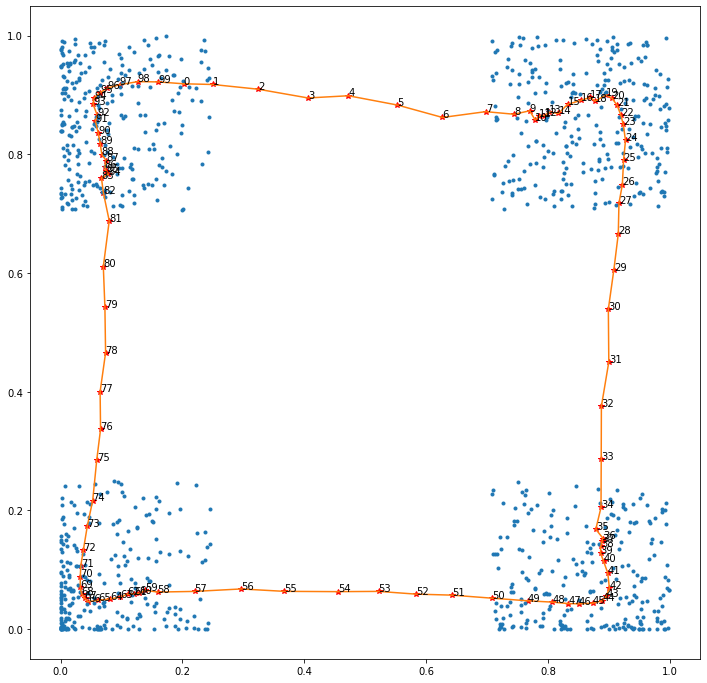

In [10]:
SOM(data_corner)

In [11]:
data_cubed=pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data_cubed[i] = [randX**3, randY**3]
data_cubed=data_cubed.T

iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  49


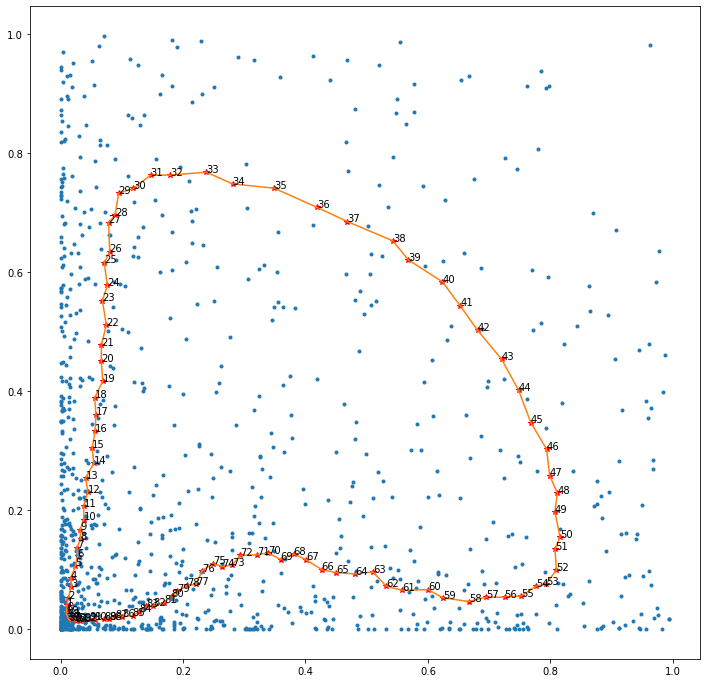

In [12]:
SOM(data_cubed)

In [13]:
def SOM_doughnut(data):
    nueron_lst=make_dlist()
    mid=15
    num=15
    alpha=1
    sampled_points=[]
    ker=cv2.getGaussianKernel(mid*2+1,-1)
    for i in range(40):
        print("iteration ",i )
#         print_graph(nueron_lst,sampled_points)
        if i>0 and i%3==0:
            num-=1
        if i>0 and i%20==0:
            alpha/=2
        sampled_points=[]
        data=data.sample(frac=1)
        for index, row in data.iterrows():
            sampled_points.append(np.array([row[0], row[1]]))
            small_dist=np.inf

            # find closest nueron
            for n in range(len(nueron_lst)):
                dist=np.sqrt((row[0]-nueron_lst[n][0])**2+(row[1]-nueron_lst[n][1])**2)
                if dist<small_dist:
                    small_dist=dist
                    spot=n
                    
            # update weights of nuerons
            new = nueron_lst[spot]+alpha*ker[mid]*(sampled_points[-1]-nueron_lst[spot])
#             new=check_new(new)
            nueron_lst[spot]=new
            
           
            for j in range(1,num):
                new = nueron_lst[(spot+j)%len(nueron_lst)]+alpha*ker[mid+j]*(sampled_points[-1]-nueron_lst[(spot+j)%len(nueron_lst)])
#                 new=check_new(new)
                nueron_lst[(spot+j)%len(nueron_lst)]=new

    print("iteration ",i )
    print_graph(nueron_lst,sampled_points)


In [14]:
# make doughnut
doughnut=pd.DataFrame()
random.seed(1)
i=0
# for i in range(5000):
while i<1000:
#     print(i)
    randX = random.uniform(-4, 4)
    randY = random.uniform(-4, 4)
    if 2<=randX**2+randY**2<=4:
        doughnut[i] = [randX, randY]
        i+=1
doughnut=doughnut.T
# X=[]
# Y=[]
# for index,row in doughnut.iterrows():
#     X.append(row[0])
#     Y.append(row[1])
# figure(figsize=(12, 12))
# # plt.plot(X,Y)
# plt.plot(X,Y,"ro")
# plt.show()

iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  39


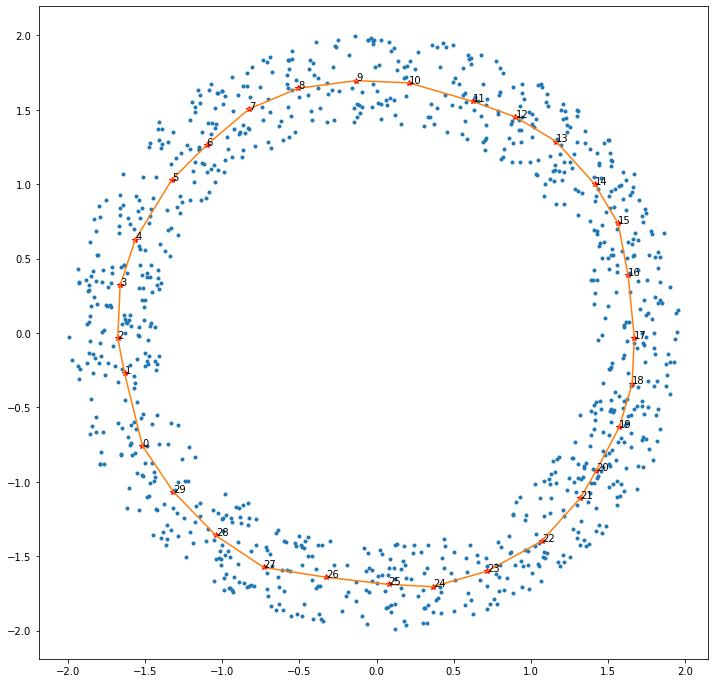

In [15]:
SOM_doughnut(doughnut)

[0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286 1.        ]


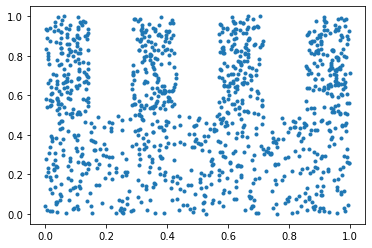

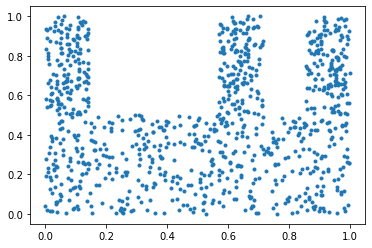

In [16]:
fin=np.arange(7)
fin=np.true_divide(fin, 7)
fin=np.append(fin,1)
print(fin)



df_4_finger=pd.DataFrame()
df_3_finger=pd.DataFrame()
random.seed(1)
#hand
i=0
while i<500:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY<=0.5:
        df_4_finger[i] = [randX, randY]
        df_3_finger[i] = [randX, randY] 
        i+=1


#pointer

while i<650:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY>=0.5:
        if fin[0]<randX<fin[1]:
            df_4_finger[i] = [randX, randY]
            df_3_finger[i] = [randX, randY] 
            i+=1

#ring

while i<800:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY>=0.5:
        if fin[4]<randX<fin[5]:
            df_4_finger[i] = [randX, randY]
            df_3_finger[i] = [randX, randY] 
            i+=1
            
#pinky

while i<950:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY>=0.5:
        if fin[6]<randX<fin[7]:
            df_4_finger[i] = [randX, randY]
            df_3_finger[i] = [randX, randY] 
            i+=1

#middle

while i<1100:
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randY>=0.5:
        if fin[2]<randX<fin[3]:
            df_4_finger[i] = [randX, randY]
            i+=1

df_4_finger=df_4_finger.T
df_3_finger=df_3_finger.T


Xp4=[]
Yp4=[]
for index, row in df_4_finger.iterrows():
    Xp4.append(row[0])
    Yp4.append(row[1])

plt.plot(Xp4,Yp4,'.')
plt.show()

Xp3=[]
Yp3=[]
for index, row in df_3_finger.iterrows():
    Xp3.append(row[0])
    Yp3.append(row[1])

plt.plot(Xp3,Yp3,'.')
plt.show()